<h1 style="color:orange">EXERCISE CLASS 7 - SPC for non-iid data </h1>



# EXERCISE 1

Data stored in the file `ESE7_ex1.csv` contains the measurements of time (in seconds) required to complete a surgical operation.
1. Design a control chart for the mean based on moving range estimate.
2. Provide an interpretation for out of control data (if any).
3. Suggest an adequate process data model.
4. Design a control chart for a ‘trend’ model.
5. Design a SCC and a FVC control charts for the process data.

> Let's start by importing the required libraries and loading the data.

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = pd.read_csv('ESE7_ex1.csv')

# Inspect the dataset
data.head()

,time
0,600
1,480
2,540
3,240
4,420


## Point 1

Design a control chart for the mean based on moving range estimate.

> ### Solution 1
>
> Control chart for individual.
>
> What if we design the control chart without any graphical analysis of the process?
>
> Computation of moving ranges $MR$:
> 1. Compute the differences between consecutive observations (lag = 1): $D_i = X_{i+1} - X_i$.
> 2. Compute the absolute values of the differences: $MR = |D_i|$.

In [2]:
# Compute the moving ranges using the diff function
data['MR'] = data['time'].diff().abs()

# Print out descriptive statistics of MR and time
data.describe()

,time,MR
count,26.000000,25.000000
mean,325.769231,123.600000
std,155.413592,114.378028
min,120.000000,0.000000
25%,210.000000,30.000000
50%,300.000000,120.000000
75%,450.000000,180.000000
max,690.000000,450.000000


> Now let's make the control chart for the mean of the moving ranges.
>
> Remember the formulas for the control limits.
>
> **I chart**:
> - $UCL = \bar{x} + 3 \left(\frac{\bar{MR}}{d_2} \right)$
> - $CL = \bar{x}$
> - $LCL = \bar{x} - 3 \left(\frac{\bar{MR}}{d_2} \right)$
>
> **MR chart**:
> - $UCL = D_4 \bar{MR}$
> - $CL = \bar{MR}$
> - $LCL = 0$

In [3]:
# Define the constants for the control limits
d2 = qda.constants.getd2(2)
D4 = qda.constants.getD4(2)

# make a copy of the data
df = data.copy()
# change the name of the column time to I
df.rename(columns={'time':'I'}, inplace=True)

# Print the first 5 rows of the new dataframe
df.head()

,I,MR
0,600,NaN
1,480,120.0
2,540,60.0
3,240,300.0
4,420,180.0


In [4]:
# Create columns for the upper and lower control limits
df['I_UCL'] = df['I'].mean() + (3*df['MR'].mean()/d2)
df['I_CL'] = df['I'].mean()
df['I_LCL'] = df['I'].mean() - (3*df['MR'].mean()/d2)
df['MR_UCL'] = D4 * df['MR'].mean()
df['MR_CL'] = df['MR'].mean()
df['MR_LCL'] = 0

# Print the first 5 rows of the new dataframe
df.head()

,I,MR,I_UCL,I_CL,I_LCL,MR_UCL,MR_CL,MR_LCL
0,600,NaN,654.382175,325.769231,-2.843713,403.743345,123.6,0
1,480,120.0,654.382175,325.769231,-2.843713,403.743345,123.6,0
2,540,60.0,654.382175,325.769231,-2.843713,403.743345,123.6,0
3,240,300.0,654.382175,325.769231,-2.843713,403.743345,123.6,0
4,420,180.0,654.382175,325.769231,-2.843713,403.743345,123.6,0


In [5]:

# Define columns for the alarm rule
df['I_TEST1'] = np.where((df['I'] > df['I_UCL']) | 
                (df['I'] < df['I_LCL']), df['I'], np.nan)
df['MR_TEST1'] = np.where((df['MR'] > df['MR_UCL']) | 
                (df['MR'] < df['MR_LCL']), df['MR'], np.nan)

# Print the first 5 rows of the new dataframe
df.head()

,I,MR,I_UCL,I_CL,I_LCL,MR_UCL,MR_CL,MR_LCL,I_TEST1,MR_TEST1
0,600,NaN,654.382175,325.769231,-2.843713,403.743345,123.6,0,NaN,NaN
1,480,120.0,654.382175,325.769231,-2.843713,403.743345,123.6,0,NaN,NaN
2,540,60.0,654.382175,325.769231,-2.843713,403.743345,123.6,0,NaN,NaN
3,240,300.0,654.382175,325.769231,-2.843713,403.743345,123.6,0,NaN,NaN
4,420,180.0,654.382175,325.769231,-2.843713,403.743345,123.6,0,NaN,NaN


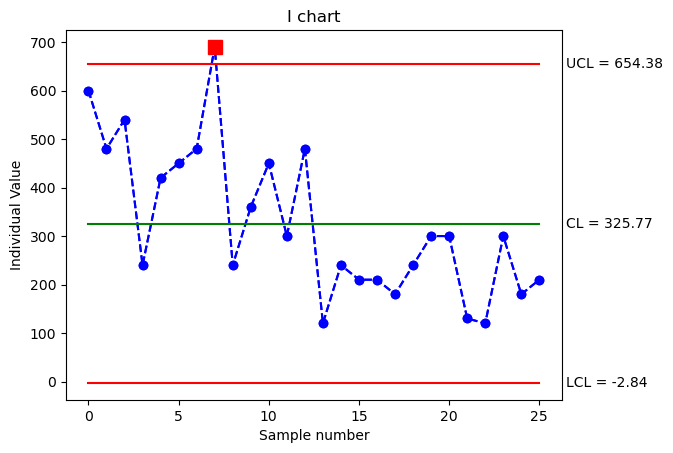

In [6]:
# Plot the I chart
plt.title('I chart')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I_UCL'], color='r')
plt.plot(df['I_CL'], color='g')
plt.plot(df['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df)+.5, df['I_UCL'].iloc[0], 'UCL = {:.2f}'.format(df['I_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['I_CL'].iloc[0], 'CL = {:.2f}'.format(df['I_CL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['I_LCL'].iloc[0], 'LCL = {:.2f}'.format(df['I_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df['I_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

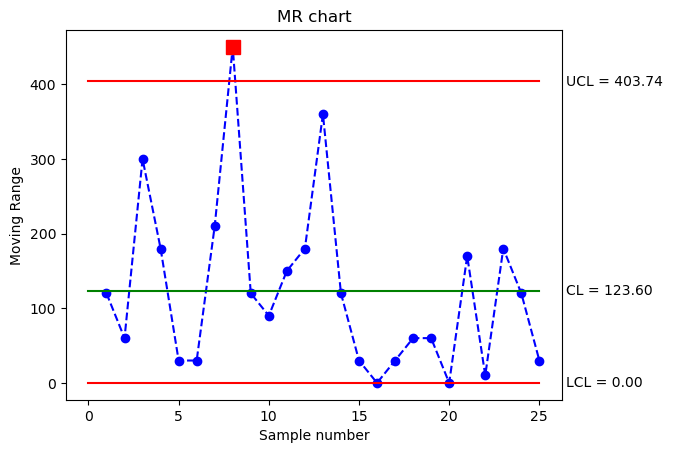

In [7]:
plt.title('MR chart')
plt.plot(df['MR'], color='b', linestyle='--', marker='o')
plt.plot(df['MR_UCL'], color='r')
plt.plot(df['MR_CL'], color='g')
plt.plot(df['MR_LCL'], color='r')
plt.ylabel('Moving Range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df)+.5, df['MR_UCL'].iloc[0], 'UCL = {:.2f}'.format(df['MR_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['MR_CL'].iloc[0], 'CL = {:.2f}'.format(df['MR_CL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['MR_LCL'].iloc[0], 'LCL = {:.2f}'.format(df['MR_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df['MR_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

## Point 2

Provide an interpretation for out of control data (if any).

> ### Solution
> The measured variable (time) is NON NEGATIVE. Thus, 𝐿𝐶𝐿 = −3 makes no sense. We can set LCL=0, but remind that it can never be violated.
>
> What can we conclude about the process?
> Nothing, because we made no check of control chart assumptions!
>
> Let's check if:
> - The data are random.
> - The data are normally distributed.

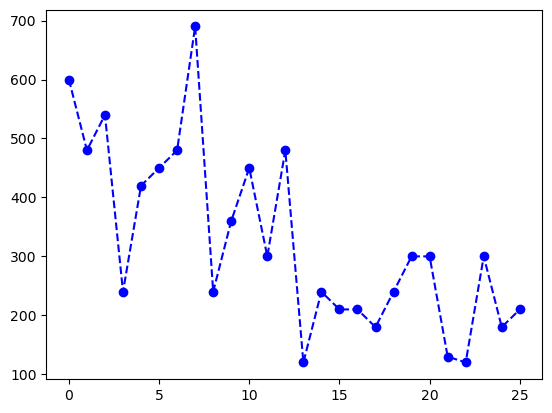

In [8]:
# Plot the data first
plt.plot(data['time'], color='b', linestyle='--', marker='o')

> Plot the autocorrelation and partial autocorrelation functions of the data. Use the `plot_acf` and `plot_pacf` functions from the `statsmodels` package.

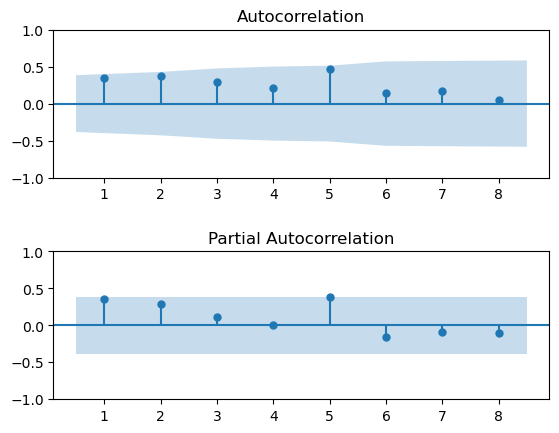

In [9]:
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data['time'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data['time'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

> Perform the runs test to check if the data are random. Use the `runstest_1samp` function from the `statsmodels` package.

In [10]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data['time'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))


Runs test p-value = 0.024


> The runs test gives a low p-value, this means that the data are not random. But remember that we have a small sample size. Let's check if the data are normally distributed.

> Test the normality of the data. 

Shapiro-Wilk test p-value = 0.081


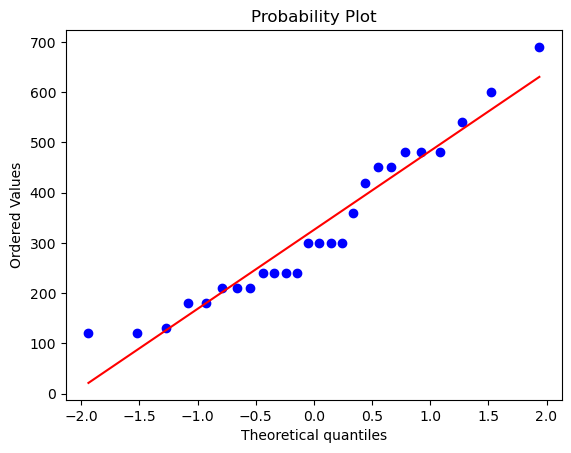

In [11]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(data['time'])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(data['time'], dist="norm", plot=plt)
plt.show()

> Data are barely normal and the process may be not random decreasing trend seems to be present. 
> 
> It is worth to try fitting a trend model. 

## Point 3

Suggest an adequate process data model.

In [12]:
# Add a column with the sample number to use as regressor
data['t'] = np.arange(1, len(data)+1)

data.head()


,time,MR,t
0,600,NaN,1
1,480,120.0,2
2,540,60.0,3
3,240,300.0,4
4,420,180.0,5


In [13]:
# Fit a regression model to the data
import statsmodels.api as sm

# Fit the linear regression model
x = data['t']
x = sm.add_constant(x)
y = data['time']
model = sm.OLS(y,x).fit()

# Print the model summary
qda.summary(model)

REGRESSION EQUATION
-------------------
time =  + 518.554 const -14.280 t

COEFFICIENTS
------------
 Term     Coef  SE Coef  T-Value    P-Value
const 518.5538  45.5680  11.3798 3.7191e-11
    t -14.2803   2.9506  -4.8397 6.2424e-05

MODEL SUMMARY
-------------
       S   R-sq  R-sq(adj)
112.8402 0.4939     0.4728

ANALYSIS OF VARIANCE
---------------------
    Source   DF     Adj SS     Adj MS  F-Value    P-Value
Regression  1.0 2.9824e+05 2.9824e+05  23.4232 6.2424e-05
     const  1.0 1.6489e+06 1.6489e+06 129.4994 3.7191e-11
         t  1.0 2.9824e+05 2.9824e+05  23.4232 6.2424e-05
     Error 24.0 3.0559e+05 1.2733e+04      NaN        NaN
     Total 25.0 6.0383e+05        NaN      NaN        NaN


/Users/marcograsso/Library/CloudStorage/OneDrive-PolitecnicodiMilano/QUALITY DATA ANALYSIS/2_ESERCITAZIONI/Lucidi esercitazioni ENGLISH 2024/ESE7 - SPC non iid/qda.py:551: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if coefficients[i] > 0:
/Users/marcograsso/Library/CloudStorage/OneDrive-PolitecnicodiMilano/QUALITY DATA ANALYSIS/2_ESERCITAZIONI/Lucidi esercitazioni ENGLISH 2024/ESE7 - SPC non iid/qda.py:552: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation += " + %.3f %s" % (coefficients[i], terms[i])
/Users/marcograsso/Library/CloudStorage/OneDrive-PolitecnicodiMilano/QUALITY DATA ANALYSIS/2_ESERCITAZIONI/Lu

> Now that we have a trend model, we can check if the assumptions on the residuals are met (randomness and normality).

Shapiro-Wilk test p-value on the residuals = 0.701


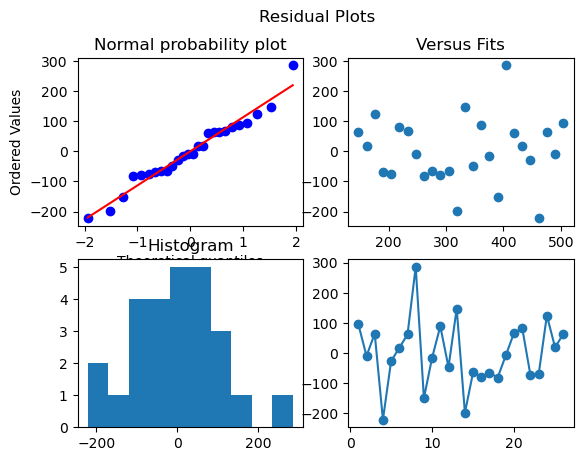

In [14]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
axs[1,0].hist(model.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model.resid)+1), model.resid, 'o-')
_, pval_SW_res = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)


Runs test p-value on the residuals = 0.710


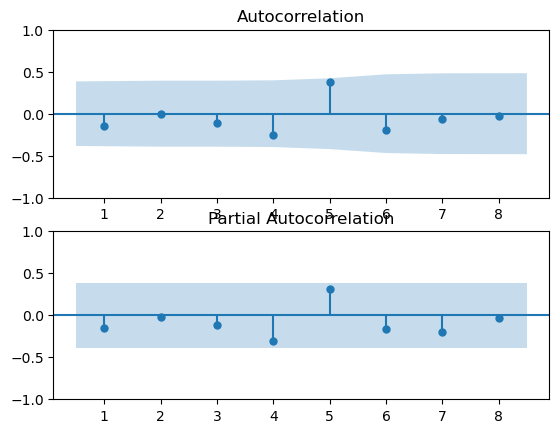

In [15]:
_, pval_runs_res = runstest_1samp(model.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[0])
sgt.plot_pacf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()


## Point 4

Design a control chart for a ‘trend’ model.

> ### Solution
> A TREND control chart will be based on the residuals of the trend model.
>
> $$UCL = \beta_0 + \beta_1 \cdot t + 3 \frac{\bar{MR}}{d_2 (2)}$$
> $$CL = \beta_0 + \beta_1 \cdot t$$
> $$LCL = \beta_0 + \beta_1 \cdot t - 3 \frac{\bar{MR}}{d_2 (2)}$$
>
> Which MR should I use? To be rigorous, we should use the MR of the residuals. Alwan states that the difference between the MR of the residuals and the MR of the original data is negligible, but let's use the MR of the residuals.

In [16]:
df_res = pd.DataFrame({'I': model.resid})
df_res['MR'] = df_res['I'].diff().abs()

df_res.describe()

,I,MR
count,2.6000e+01,25.0000
mean,1.8474e-13,126.7985
std,1.1056e+02,109.5280
min,-2.2143e+02,4.2803
25%,-6.9026e+01,44.2803
50%,-8.6103e+00,105.7197
75%,6.6362e+01,194.2803
max,2.8569e+02,435.7197


> Let's create a TREND control chart. We can use the model fits and the MR of the residuals to compute the control limits. 

In [17]:
# Let's reuse the old dataframe df
# Replace the I_CL column with the fitted values
df['I_CL'] = model.fittedvalues

# Replace the I_UCL and I_LCL columns with the upper and 
# lower control limits computed from the formula
df['I_UCL'] = df['I_CL'] + 3 * df_res['MR'].mean() / d2
df['I_LCL'] = df['I_CL'] - 3 * df_res['MR'].mean() / d2

# Also update the TEST1 column
df['I_TEST1'] = np.where((df['I'] > df['I_UCL']) | (df['I'] < df['I_LCL']), df['I'], np.nan)


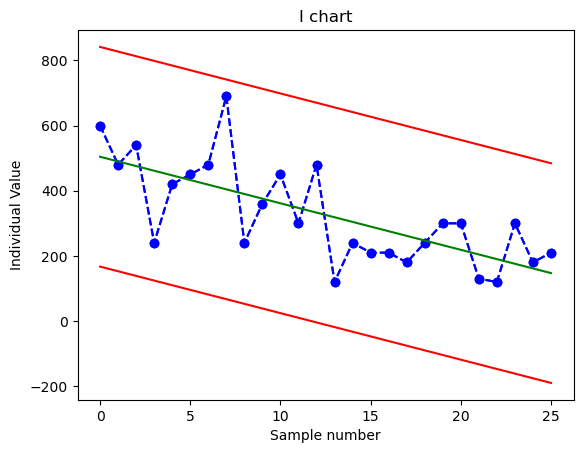

In [18]:
# Plot the I chart
plt.title('I chart')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I_UCL'], color='r')
plt.plot(df['I_CL'], color='g')
plt.plot(df['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# highlight the points that violate the alarm rules
plt.plot(df['I_TEST1'], linestyle='none', marker='s', 
        color='r', markersize=10)

plt.show()

> Now there are no out of control points. But the LCL has values below 0. This makes no sense, because the time cannot be negative. We can set LCL=0, but remind that it can never be violated.

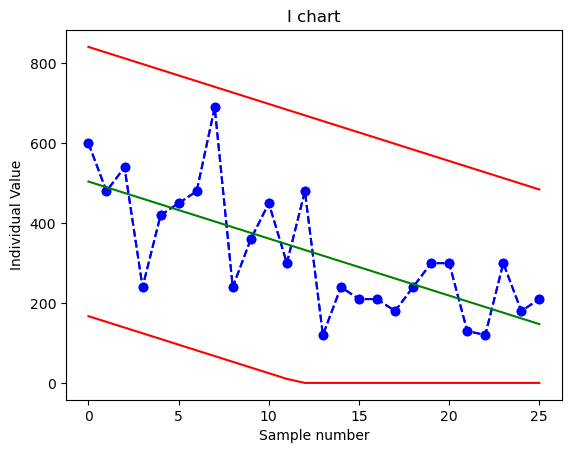

In [19]:
df['I_LCL'] = np.where((df['I_LCL'] < 0), 0, df['I_LCL'])
# Plot the I chart
plt.title('I chart')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I_UCL'], color='r')
plt.plot(df['I_CL'], color='g')
plt.plot(df['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# highlight the points that violate the alarm rules
plt.plot(df['I_TEST1'], linestyle='none', marker='s', 
        color='r', markersize=10)

plt.show()

## Point 5

Design a SCC and a FVC control charts for the process data.

> ### Solution
>
> Let's build the same I-MR chart this time using the model residuals.

In [20]:
# Create columns for the upper and lower control limits
df_res['I_UCL'] = df_res['I'].mean() + (3*df_res['MR'].mean()/d2)
df_res['I_CL'] = df_res['I'].mean()
df_res['I_LCL'] = df_res['I'].mean() - (3*df_res['MR'].mean()/d2)
df_res['MR_UCL'] = D4 * df_res['MR'].mean()
df_res['MR_CL'] = df_res['MR'].mean()
df_res['MR_LCL'] = 0

# Define columns for the Western Electric alarm rules
df_res['I_TEST1'] = np.where((df_res['I'] > df_res['I_UCL']) | 
            (df_res['I'] < df_res['I_LCL']), df_res['I'], np.nan)
df_res['MR_TEST1'] = np.where((df_res['MR'] > df_res['MR_UCL']) | 
            (df_res['MR'] < df_res['MR_LCL']), df_res['MR'], np.nan)

# Print the first 5 rows of the new dataframe
df_res.head()

,I,MR,I_UCL,I_CL,I_LCL,MR_UCL,MR_CL,MR_LCL,I_TEST1,MR_TEST1
0,95.7265,NaN,337.1167,1.8474e-13,-337.1167,414.1913,126.7985,0,NaN,NaN
1,-9.9932,105.7197,337.1167,1.8474e-13,-337.1167,414.1913,126.7985,0,NaN,NaN
2,64.2872,74.2803,337.1167,1.8474e-13,-337.1167,414.1913,126.7985,0,NaN,NaN
3,-221.4325,285.7197,337.1167,1.8474e-13,-337.1167,414.1913,126.7985,0,NaN,NaN
4,-27.1521,194.2803,337.1167,1.8474e-13,-337.1167,414.1913,126.7985,0,NaN,NaN


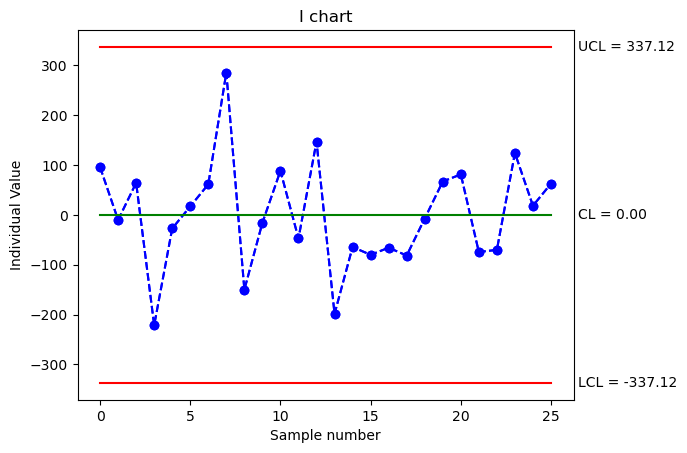

In [21]:
# Plot the I chart
plt.title('I chart')
plt.plot(df_res['I'], color='b', linestyle='--', marker='o')
plt.plot(df_res['I'], color='b', linestyle='--', marker='o')
plt.plot(df_res['I_UCL'], color='r')
plt.plot(df_res['I_CL'], color='g')
plt.plot(df_res['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
# print the first value of the column I_UCL
plt.text(len(df_res)+.5, df_res['I_UCL'].iloc[0], 
        'UCL = {:.2f}'.format(df_res['I_UCL'].iloc[0]), 
        verticalalignment='center')
plt.text(len(df_res)+.5, df_res['I_CL'].iloc[0], 
        'CL = {:.2f}'.format(df_res['I_CL'].iloc[0]), 
        verticalalignment='center')
plt.text(len(df_res)+.5, df_res['I_LCL'].iloc[0], 
        'LCL = {:.2f}'.format(df_res['I_LCL'].iloc[0]), 
        verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df_res['I_TEST1'], linestyle='none', marker='s', 
        color='r', markersize=10)

plt.show()

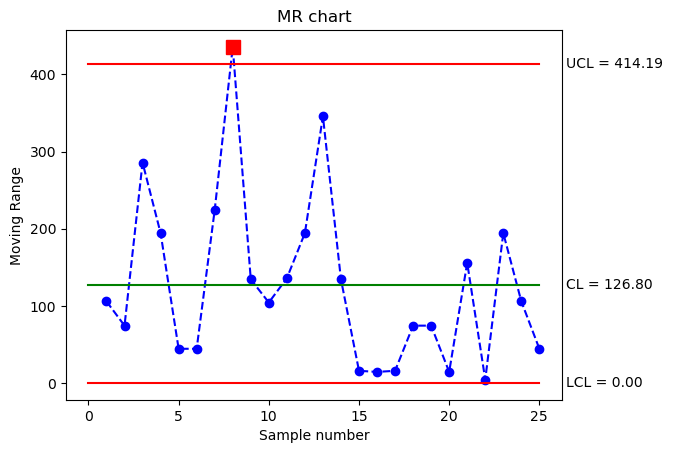

In [22]:
plt.title('MR chart')
plt.plot(df_res['MR'], color='b', linestyle='--', marker='o')
plt.plot(df_res['MR_UCL'], color='r')
plt.plot(df_res['MR_CL'], color='g')
plt.plot(df_res['MR_LCL'], color='r')
plt.ylabel('Moving Range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df_res)+.5, df_res['MR_UCL'].iloc[0], \
         'UCL = {:.2f}'.format(df_res['MR_UCL'].iloc[0]), 
         verticalalignment='center')
plt.text(len(df_res)+.5, df_res['MR_CL'].iloc[0], 
        'CL = {:.2f}'.format(df_res['MR_CL'].iloc[0]), 
        verticalalignment='center')
plt.text(len(df_res)+.5, df_res['MR_LCL'].iloc[0], 
        'LCL = {:.2f}'.format(df_res['MR_LCL'].iloc[0]), 
        verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df_res['MR_TEST1'], linestyle='none', marker='s', 
        color='r', markersize=10)

plt.show()

> Now assume we found an assignable cause for the OOC observation 8. 
>
> We need to redesign the control charts by inserting a DUMMY VARIABLE such that:
> - $dummy = 0$ for $t \neq 8$
> - $dummy = 1$ for $t = 8$

In [23]:
# Create the dummy variable X
data['dummy'] = np.where((data['t'] == 8), 1, 0)

data.head()

,time,MR,t,dummy
0,600,NaN,1,0
1,480,120.0,2,0
2,540,60.0,3,0
3,240,300.0,4,0
4,420,180.0,5,0


In [24]:
# Fit a model
x = data[['t', 'dummy']]
x = sm.add_constant(x)
y = data['time']
model2 = sm.OLS(y,x).fit()
qda.summary(model2)

REGRESSION EQUATION
-------------------
time =  + 491.459 const -13.138 t + 303.648 dummy

COEFFICIENTS
------------
 Term     Coef  SE Coef  T-Value    P-Value
const 491.4591  40.4001  12.1648 1.6827e-11
    t -13.1384   2.5785  -5.0953 3.6839e-05
dummy 303.6483 100.5632   3.0195 6.1044e-03

MODEL SUMMARY
-------------
      S   R-sq  R-sq(adj)
97.5439 0.6376     0.6061

ANALYSIS OF VARIANCE
---------------------
    Source   DF     Adj SS     Adj MS  F-Value    P-Value
Regression  2.0 3.8499e+05 1.9250e+05  20.2313 8.5294e-06
     const  1.0 1.4080e+06 1.4080e+06 147.9824 1.6827e-11
         t  1.0 2.4702e+05 2.4702e+05  25.9620 3.6839e-05
     dummy  1.0 8.6749e+04 8.6749e+04   9.1172 6.1044e-03
     Error 23.0 2.1884e+05 9.5148e+03      NaN        NaN
     Total 25.0 6.0383e+05        NaN      NaN        NaN


/Users/marcograsso/Library/CloudStorage/OneDrive-PolitecnicodiMilano/QUALITY DATA ANALYSIS/2_ESERCITAZIONI/Lucidi esercitazioni ENGLISH 2024/ESE7 - SPC non iid/qda.py:551: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if coefficients[i] > 0:
/Users/marcograsso/Library/CloudStorage/OneDrive-PolitecnicodiMilano/QUALITY DATA ANALYSIS/2_ESERCITAZIONI/Lucidi esercitazioni ENGLISH 2024/ESE7 - SPC non iid/qda.py:552: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation += " + %.3f %s" % (coefficients[i], terms[i])
/Users/marcograsso/Library/CloudStorage/OneDrive-PolitecnicodiMilano/QUALITY DATA ANALYSIS/2_ESERCITAZIONI/Lu

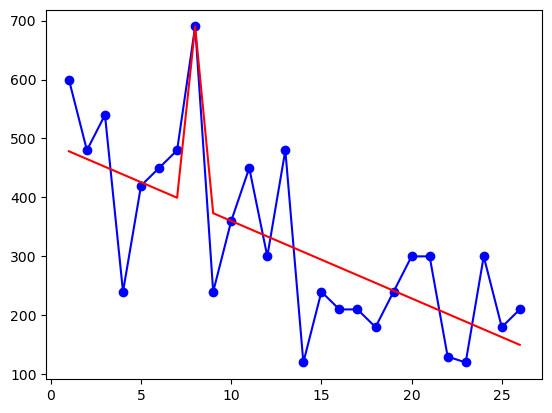

In [25]:
plt.plot(data['t'], data['time'], color='b', linestyle='-', marker='o')
plt.plot(data['t'], model2.fittedvalues, color='r')
plt.show()

> Now that we have a trend model, we can check if the assumptions on the residuals are met (randomness and normality).

Shapiro-Wilk test p-value on the residuals = 0.530


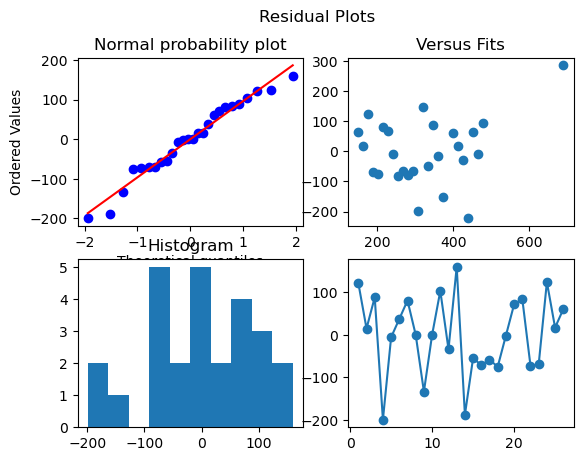

In [26]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model2.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model2.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
axs[1,0].hist(model2.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model2.resid)+1), model2.resid, 'o-')

_, pval_SW_res = stats.shapiro(model2.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)


Runs test p-value on the residuals = 0.230


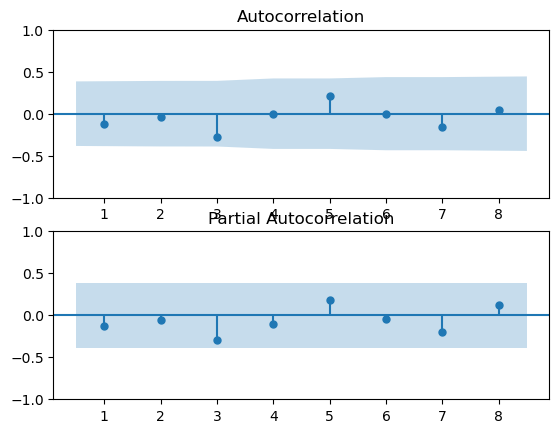

In [27]:
_, pval_runs_res = runstest_1samp(model2.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model2.resid, lags = int(len(data)/3), zero=False, ax=ax[0])
sgt.plot_pacf(model2.resid, lags = int(len(data)/3), zero=False, ax=ax[1],
            method = 'ywm')
plt.show()

> Build a new SCC control chart on the residuals of the new trend model.

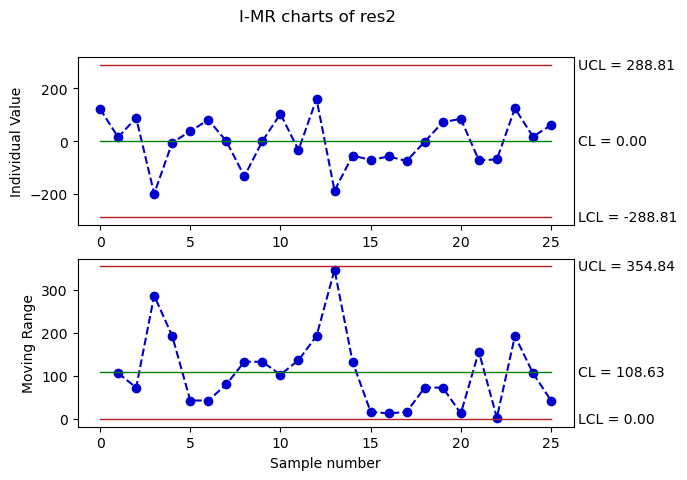

In [28]:
# Make a new dataframe for the new residuals
df_res2 = pd.DataFrame({'res2': model2.resid})

# Create the IMR chart
df_res2 = qda.ControlCharts.IMR(df_res2, 'res2')